# Defacing pre-registration - Statistical analysis in R

## Function to simulate data with missing values

In [1]:
source("simulate_data.R")

Simulate ratings

In [2]:
n_sub <- 185 #nbr of subjects available in the dataset
n_rated <- 185
n_rater <- 4 #nbr of raters
#Define for each rater the percentage of biased ratings
perc_biased <- c(20,40,50,60)
ratings_range <- 1:4
bias <- 1

df <- simulate_data(n_rated, n_sub, n_rater, perc_biased, ratings_range=ratings_range, bias=bias)
df$ratings <- as.numeric(df$ratings)
df

sub,defaced,rater,ratings
<int>,<fct>,<fct>,<dbl>
1,original,rater01,3
1,defaced,rater01,4
2,original,rater01,3
2,defaced,rater01,3
3,original,rater01,1
3,defaced,rater01,2
4,original,rater01,3
4,defaced,rater01,3
5,original,rater01,3


## Exploration of the data

### Do we need to model the random effect of the raters?

We use an interaction plot to figure if an interaction between the defacing status and the rater is present. If the lines are not parallel, an interaction exists. Plot construction based on https://stattrek.com/multiple-regression/interaction.

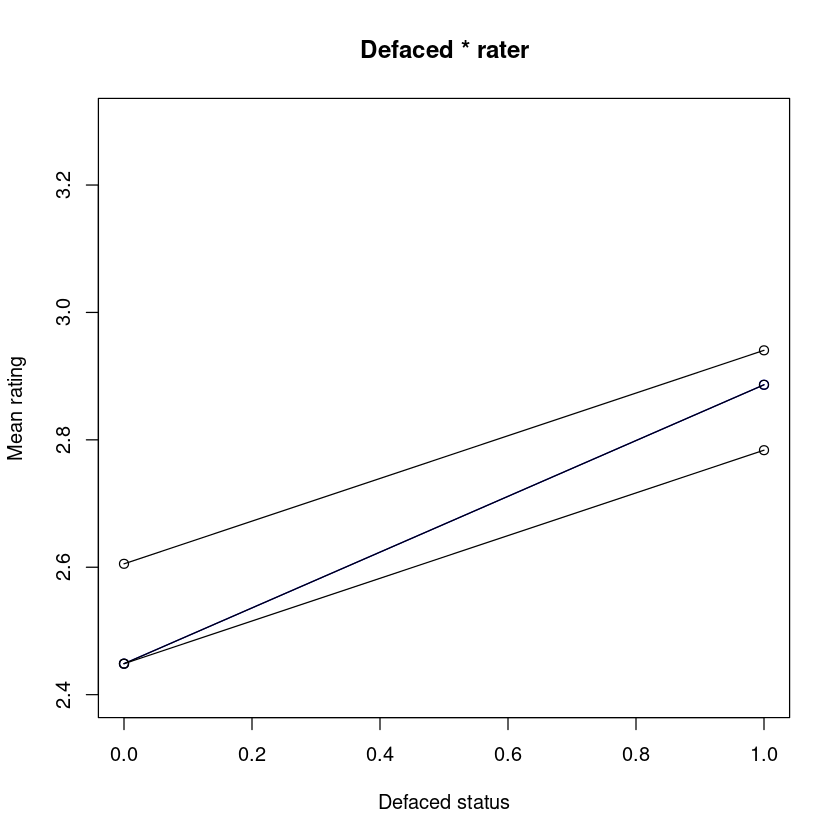

In [3]:
#Compute mean rating for each rater and each condition
mean_defaced = c()
mean_original = c()
for (i in 1:n_rater){
    df_small_defaced <- subset(df, defaced == 'defaced' & rater == sprintf('rater%02d', i))
    df_small_original <- subset(df, defaced == 'original' & rater == sprintf('rater%02d', i))
    mean_defaced[i] <- mean(as.numeric(df_small_defaced$ratings))
    mean_original[i] <- mean(as.numeric(df_small_original$ratings))
}

#Interaction plot
plot(c(0,1), c(mean_original[i], mean_defaced[i]),
    ylab="Mean rating",
    xlab="Defaced status",
    main ='Defaced * rater',
    ylim = c(2.4,3.3),
    type="o",
    col="blue")
for (i in 2:n_rater){ 
    lines(c(0,1), c(mean_original[i], mean_defaced[i]), type='o')
}

In the plot above, one line represents the evolution of the mean rating before and after defacing for one rater. The lines are not parallel, so we have to model the random effect of the raters. This can be interpreted as different raters are differently biased by the defacing process.

## Linear mixed-effects models

We will test if including the defacing factor as fixed effect improves the model fit using a likelihood-ratio test.

In [4]:
## Fit model without defaced as fixed effect
library(lme4)
fm0 <- lmer(as.numeric(ratings) ~ (1 | rater), data=df)
summary(fm0)

## Fit model with defaced as fixed effect
library(lme4)
fm1 <- lmer(as.numeric(ratings) ~ defaced + (1 | rater), data=df)
summary(fm1)
ranef(fm1)

#Likelihood-ratio test
anova(fm0, fm1)

Loading required package: Matrix



Linear mixed model fit by REML ['lmerMod']
Formula: as.numeric(ratings) ~ (1 | rater)
   Data: df

REML criterion at convergence: 4512.5

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.5579 -0.6559  0.2461  1.1482  1.2723 

Random effects:
 Groups   Name        Variance Std.Dev.
 rater    (Intercept) 0.005441 0.07376 
 Residual             1.229043 1.10862 
Number of obs: 1480, groups:  rater, 4

Fixed effects:
            Estimate Std. Error t value
(Intercept)   2.6520     0.0468   56.66

Linear mixed model fit by REML ['lmerMod']
Formula: as.numeric(ratings) ~ defaced + (1 | rater)
   Data: df

REML criterion at convergence: 4485.7

Scaled residuals: 
    Min      1Q  Median      3Q     Max 
-1.7191 -0.7477  0.1635  1.0746  1.4305 

Random effects:
 Groups   Name        Variance Std.Dev.
 rater    (Intercept) 0.005507 0.07421 
 Residual             1.204579 1.09753 
Number of obs: 1480, groups:  rater, 4

Fixed effects:
               Estimate Std. Error t value
(Intercept)     2.49324    0.05481  45.486
defaceddefaced  0.31757    0.05706   5.566

Correlation of Fixed Effects:
            (Intr)
defaceddfcd -0.520

$rater
         (Intercept)
rater01 -0.063270567
rater02 -0.022505638
rater03  0.076009607
rater04  0.009766598

with conditional variances for “rater” 

refitting model(s) with ML (instead of REML)



,npar,AIC,BIC,logLik,deviance,Chisq,Df,Pr(>Chisq)
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
fm0,3,4514.016,4529.916,-2254.008,4508.016,NA,NA,NA
fm1,4,4485.339,4506.539,-2238.670,4477.339,30.67695,1,3.047633e-08


The p-value for the likelihood-ratio test is significant (3e-8) meaning that defacing influence on the manual ratings is significant.